<a href="https://colab.research.google.com/github/jadercaro/Prediccion-de-desercion-universitaria/blob/main/1_regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

**Solo un integrante del equipo de trabajo realizará la entrega del trabajo de esta sesión**. El entregable es el notebook con los ajustes a sus bases de datos y las respuestas a las preguntas.


In [ ]:
#@title **Integrantes**
nombres_apellidos_integrante_1 ='Jhon Jader Caro Sanchez' #@param {type:"string"}
nombres_apellidos_integrante_2 = 'Jagler David Velasquez Velasquez'  #@param {type:"string"}
nombres_apellidos_integrante_3 = 'Alejandro Arias Ortiz'  #@param {type:"string"}

In [ ]:
#@title **EDA**
link_notebook_EDA_regresión ='https://colab.research.google.com/drive/1H3qyKXoXmjXBMZNhlhQf-KtnvM9JIaih?usp=sharing' #@param {type:"string"}
#@title **EDA**
link_notebook_EDA_clasificación ='https://colab.research.google.com/drive/1_1WrJxIyHoEj4zMJ3MKOLeXM2CRPbaeR?usp=sharing' #@param {type:"string"}

#**Parte 1 Regresión polinomial múltiple (regresión lineal)**


In [ ]:
#Importing all the dependencies
import pandas as pd
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.model_selection import train_test_split

## **Ejercicio 1: Contextualización del problema**

Describe brevemente tu base de datos y has breve contexto del problema que abordarán en regresión lineal

El objetivo de nuestro estudio de regresión es predecir los niveles de **colesterol** a partir de una serie de características médicas. Seleccioné un conjunto inicial de 12 características potenciales, pero para simplificar el modelo, decidí reducirlo a solo 5 características principales. Estas características fueron seleccionadas debido a su alta correlación de R de Pearson y relación de correlación con respecto a la variable objetivo, que es el nivel de colesterol en sangre.

Las características numéricas que hemos elegido para incluir en nuestro modelo son:

  1. **Presión arterial en reposo en mm Hg al ingreso al hospital** (trestbps) - Númerica

  2. **Edad del paciente** (age) - Númerica

  3. **Número de vasos principales coloreados por fluoroscopía** (ca) - Númerica

  4. **Sexo del paciente** (sex) - Catégorica

  5. **Resultados electrocardiográficos en reposo**(restecg) -Catégorica

  6. **Colesterol**(chol) - Númerica


**Carga la base de datos**
<br> Selecciona las variables de entrada (x) de tu modelo de regresión lineal e indica cuál es tu variable salida (variable objetivo, y).

In [ ]:
db = pd.read_csv('regresion_preprocesado.csv')
x = db[['trestbps','age','sex','ca','restecg_0','restecg_1','restecg_2']]
y = db['chol']

In [ ]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos", x)
print(x.shape)
print()
print("variable a predecir", y)
print(y.shape)

conjunto de datos      trestbps       age  sex        ca  restecg_0  restecg_1  restecg_2
0    0.757525  0.948726    1  0.000000        0.0        0.0        1.0
1    1.611220  1.392002    1  3.000000        0.0        0.0        1.0
2   -0.665300  1.392002    1  2.000000        0.0        0.0        1.0
3   -0.096170 -1.932564    1  0.000000        1.0        0.0        0.0
4   -0.096170 -1.489288    0  0.000000        0.0        0.0        1.0
..        ...       ...  ...       ...        ...        ...        ...
298 -1.234430 -1.046013    1  0.000000        1.0        0.0        0.0
299  0.700612  1.502821    1  2.000000        1.0        0.0        0.0
300 -0.096170  0.283813    1  1.000000        1.0        0.0        0.0
301 -0.096170  0.283813    0  1.000000        0.0        0.0        1.0
302  0.359134 -1.821745    1  0.672241        1.0        0.0        0.0

[303 rows x 7 columns]
(303, 7)

variable a predecir 0      233.0
1      286.0
2      229.0
3      250.0
4      204.0

In [ ]:
def num_muestras_carac(X):
    """Esta funcion es encargada retornar el numero de muestras
        y caracteristicas del conjunto de datos X

        X: matriz numpy
        retorna:
            numero de muestras (int/float)
            numero de caracteristicas (int/float)

    """

    return X.shape

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Explique en sus palabras que es un problema de regresión?
respuesta_1_1 = "Un problema de regresión es aquel que busca encontrar una relación entre unas variables de entrada y una variable de salida continua" #@param {type:"string"}

## Ejercicio 2

Analice los siguientes métodos de la teoría  de modelos de  *regresión polinomial múltiple*:

1. error cuadrático medio (**ECM**)
2. modelo de regresión múltiple (**regression**)
3. calculo del costo de la regresión (**cost**)
4. extension de matriz (**extension_matriz**)

La siguiente celda contiene la implementación de estas 4 funciones. Analizar y entender su funcionamiento

In [ ]:
def ECM(Y_est,Y):
    """funcion para calcular el error cuadratico medio
    Y_est: debe contener los valores predichos por el modelo evaluar
    Y: debe contener los valores reales
    retorna: error cuadratico medio
    """
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(N)
    return ecm

def regression(X, W):
    """calcula la regresión multiple
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado
    """
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


def error_c(W,X,Y):
    """calcula el error de la regresión
    W: son los pesos usadados para realizar la regresión
    X: los valores que corresponden a las caractersiticas
    Y: el valor de salida esperadas

    retorna: valor de error
    """

    m = len(Y)
    y_est = regression(X,W)
    error = (1/2*m) * np.sum(np.square(y_est-Y))
    return error

def extension_matriz(X):
    """funcion que realiza la extension de la matriz X
    X: los valores que corresponden a las caractersiticas sin extender
    Y: el valor de salida esperadas

    retorna: X_ext: matriz con unos extendidos, Y: maitrz con dimensiones ajustadas
    """
    #Obtenemos las dimensiones antes de exteneder la matriz
    muestras,caracterisitcas = num_muestras_carac(X)
    #Extendemos la matriz X
    unos = np.array([np.ones(muestras)])
    X_ext = np.concatenate((unos.T, X), axis=1)
    X_ext = X_ext.reshape(muestras, caracterisitcas+1)
    return (X_ext)

In [ ]:
print(x.shape)

(303, 7)


In [ ]:
print(extension_matriz(x).shape)

(303, 8)


In [ ]:
#@title **Pregunta Abierta**
#@markdown **Analiza el código de la funcion `extension_matriz`**
#@markdown <br> ¿Cuál de las siguientes opciones es la correcta? Recuerda usar la teoría como herramienta

#@markdown A) `np.concatenate((unos.T, X), axis=1)` puede ser reemplazada por `np.concatenate((unos, X.T), axis=0)`

#@markdown B) `np.concatenate((unos.T, X), axis=1)` hace referencia a la extensión de matrix, que es necesaria para ajustar un termino independiente en el modelo de regresión

#@markdown C) La función nos ayuda ha asegurar que dos matrices A y B son multiplicables, haciendo que número de columnas de A coincida con el número de filas de B

#@markdown D) El modelo de regresión tiene terminos independientes y dependientes, para que el modelo funcione debemos usar la extensión de matriz para adicionar varias columnas-vector de `1`

#@markdown E) Ninguna de las anteriores

#@markdown Selecciona dentro las lista desplegable
respuesta_1_2 = 'B' #@param ["", "A", "B", "C", "D","E"]

Ahora vamos a utilizar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>:

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$

recordar que

$$ \frac{\partial E(w)}{\partial w_j} = \frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right) \frac{\partial }{\partial w_j} f({\bf{x}}_i, {\bf{w}})$$



In [ ]:
## Ejercicio de codigo
def gradiente_descendente(X, Y, eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos
    Y: vector con los valores a predecir
    eta: Taza de aprendizaje
    iteraciones:

    retorna: W el valor de de los parametros de regresión polinomica
             errores: array con el error por iteracion
    """
    # nuevamente usamos la función
    # para saber el numero de muestras y caractersiticas
    X_ext = extension_matriz(X)
    # usar la funcion creada anteriormente
    N, caracterisitcas = num_muestras_carac(X_ext)
    #Inicializamos el vector de parámetros con ceros y
    W = np.zeros((1,caracterisitcas))
    W = W.reshape(np.size(W), 1)
    # incializamos vector para almacenar el costo
    errores = np.zeros(iteraciones)

    for i in range(iteraciones):
        ## Aca debes completar la funcion! recuerda que solo debes usar numpy (np.funcion_a_usar)
        # o las funciones definidas anteriormente
        # usa la funcion que hace la regresion y que definimos antes
        y_est = regression(X_ext,W)
        f_xw_min_yi = y_est-Y
        temp =np.dot(X_ext.T, f_xw_min_yi)
        # acutaliza
        W =W-eta*temp/N
        errores[i] = error_c(W,X_ext,Y)

    return W, errores

## Ejercicio 3: Entrenamiento

Con la función implementada vamos a entrenar un modelo y calcular su error de entrenamiento. Antes de realizar esto, debemos separar nuestro conjunto de datos.

**from sklearn.model_selection import train_test_split **
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=3)

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)

(212, 7)
(212,)


In [ ]:
Ytrain = np.array(Ytrain).reshape(212,1)

In [ ]:
print(Xtest.shape)
print(Ytest.shape)

(91, 7)
(91,)


In [ ]:
Ytest = np.array(Ytest).reshape(91,1)

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Cuántas muestras tiene el conjunto de entrenamiento y por qué es menor que el conjunto de prueba?
respuesta_1_3 = "El conjunto de entrenamiento tiene 212 muestras, el de entrenamiento es mayor ya que es necesario que el modelo detecte el patrón de los datos lo suficientemente bien, para que al momento de que se presente un nuevo dato (datos de testeo) lo prediga con el minimo error " #@param {type:"string"}

Ahora entrena ejecutando la siguiente línea de código y verifiquemos el comportamiento del error

Text(0.5, 0, 'iteraciones')

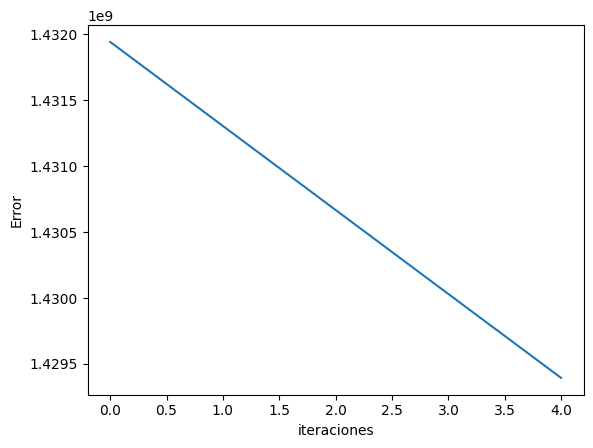

In [ ]:
W, error = gradiente_descendente(Xtrain, Ytrain, eta = 0.0001, iteraciones=5)
# graficar iteraciones y el error
plt.plot(range(5), error)
plt.ylabel('Error')
plt.xlabel('iteraciones')

El error es la medida interna de nuestro algoritmo de optimización sin embargo, para este tipo de problemas al final debemos evaluar qué tan bien estamos modelando nuestra salida.
Vamos a evaluar nuestro modelo calculando el error cuadrático medio. Para ello vamos crear a una función.

In [ ]:
## Ejercicio de Código
def evaluar_modelo (W, Y_True, X_to_test):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    Y_True: valores reales para usar en el evaluamiento del modelo
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo

    retorna: el error cuadratico medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    X_to_test_ext = extension_matriz(X_to_test)
    y_est =regression(X_to_test_ext, W)
    error =ECM(y_est, Y_True)

    return(error)

In [ ]:
# y ahora usala para calcular el error, para evaluar el modelo
error_train = evaluar_modelo(W, X_to_test = Xtrain,  Y_True = Ytrain)
print("error en entrenamiento del modelo", error_train)
error_test = evaluar_modelo(W, X_to_test = Xtest,  Y_True = Ytest)
print("error en la evaluación del modelo", error_test)

error en entrenamiento del modelo 63607.779159957965
error en la evaluación del modelo 62867.99095527694


In [ ]:
math.sqrt(error_test)

250.73490174939135

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)
print(W)

(212, 7)
(212, 1)
[[0.12344477]
 [0.00898258]
 [0.00166508]
 [0.0813574 ]
 [0.07790464]
 [0.05728725]
 [0.00169739]
 [0.06446013]]


In [ ]:
#@title Pregunta Abierta
#@markdown  **¿Qué tan buena es la predicción de tu modelo?** Justifica tu respuesta.
respuesta_1_4 = "El modelo actual es malo en predicción, a pesar de que el ECM es parecido tanto en entrenamiento como en validación, el error es grande comparado al esperado, se debe probar con un método más robusto o ajustar los parámetros de manera más adecuada " #@param {type:"string"}

Hasta ahora lo que hemos realizado es un regresión lineal no polinómica. Nuestro siguiente objetivo es tomar esta regresión y transformarla en polinómica. Comprenda el funcionamiento de la función propuesta

In [ ]:
#Potencia de polinomio
def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las caractersiticas
    grado: esl grado para realizar la potencia al polinomio
    retorna: el valor de X despues elevarlo al grado del polinimoo indicado
    """
    X2 = X.copy()

    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)

    return X2

In [ ]:
## Ejercicio de codigo
def gradiente_descendente_poly (X, Y, eta, iteraciones, grado):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    eta: Taza de aprendizaje
    iteraciones: numero de iteraciones máximo para el gradiente
    grado: el valor del polinomio a usar

    retorna: W el valor de de los parametros de regresión polinómica
             error: array con el valor del error por cada iteración

    """
    ## completa el codigo
    X2 = potenciaPolinomio(X, grado)
    W, error =gradiente_descendente(X2,Y, eta, iteraciones)
    return (W, error)

def evaluar_modelo_poly (Y_True, X_to_test, W, grado):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    Y_True: valores reales para usar en el evaluamiento del modelo
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    W: es un matriz con los parametros del modelo entrenados
    grado: grado del polinimio a usar

    retorna: el error cuadratico medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    X2 = potenciaPolinomio(X_to_test, grado)
    error = evaluar_modelo(W,Y_True,X2)

    return(error)

Entrenemos y evaluemos el comportamiento del error con la regresion polinomica ¿El cambio fue bueno?

Text(0.5, 0, 'iteraciones')

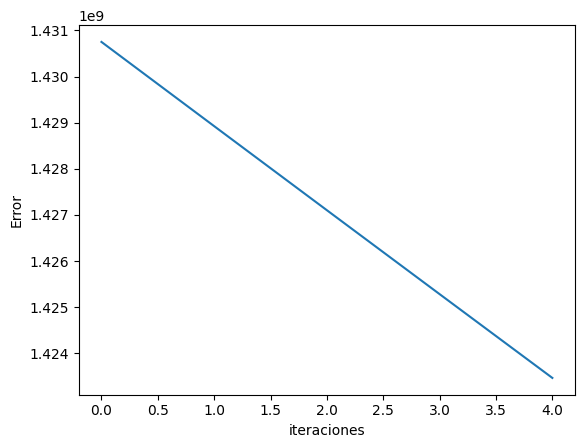

In [ ]:
# entrenamos
W, error_poly = gradiente_descendente_poly(Xtrain, Ytrain, eta = 0.0001, iteraciones=5, grado = 2)
plt.plot(range(5), error_poly)
plt.ylabel('Error')
plt.xlabel('iteraciones')

In [ ]:
# completa los parametros para evaluar el modelo
error_test = evaluar_modelo_poly(W=W, X_to_test = Xtest,  Y_True = Ytest, grado = 2)
print("error en la evaluación del modelo", error_test)

error en la evaluación del modelo 62560.05435574228


In [ ]:
np.sqrt(error_test)

250.12007987313268

## Ejercicio 4: Experimentar

En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinimios. Vamos a dejar por ahora un numero de iteraciones fijas = 5.



In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos de entreanmiendo
    Xtest:  conjunto de datos de prueba
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 5

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:

            # ignorar el costo
            W, _ = gradiente_descendente_poly(Xtrain,Ytrain, eta,numero_iter, grado)
            error = evaluar_modelo_poly(Ytest, Xtest,W, grado)

            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'ecm'] = error
            idx = idx+1

    return (resultados)

In [ ]:
## Ahora usa para verlos los resultados
tasas_aprendizaje = [1e-2,1e-1,0.2,0.3,0.4,0.5, 0.6]
grados_polinomio = [1,2,3]
resultados_ex1 = experimentar(Xtrain, Xtest, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)

In [ ]:
# ver los resultados
resultados_ex1.sort_values(by='ecm')

,grado,tasa de aprendizaje,ecm
15,1.0,0.50,3.332385e+03
18,1.0,0.60,3.335133e+03
12,1.0,0.40,3.539254e+03
9,1.0,0.30,3.887798e+03
6,1.0,0.20,4.549039e+03
4,2.0,0.10,7.607795e+03
3,1.0,0.10,8.200654e+03
2,3.0,0.01,2.890250e+04
1,2.0,0.01,3.237822e+04
0,1.0,0.01,4.975180e+04


Si has implementado todo correctamente,  debes evidenciar la importancia de normalizar antes de los entrenamientos.

Responde la siguiente pregunta y analiza la función de python. [Revisa la documentacion de esta libreria](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)


In [ ]:
#@title Pregunta Abierta
#@markdown  **¿Por qué es necesaria la normalización en el modelo de regresión?**
respuesta_1_5 = "La normalización en el modelo de regresión es necesaria para evitar que las características con diferentes escalas dominen sobre otras, mejorar la convergencia del algoritmo de optimización y hacer que el modelo sea más robusto ante datos atípicos o sesgados." #@param {type:"string"}

In [ ]:
#Normalizamos los datos
def normalizar(Xtrain, Xtest):
    """ función que se usa para normalizar los datos con
    un metodo especifico
    Xtrain: matriz de datos entrenamiento a normalizar
    Xtest: matriz de datos evaluación a normalizar
    retorna: matrices normalizadas
    """

    media = np.mean(Xtrain, axis = 0)
    desvia = np.std(Xtrain, axis = 0)
    Xtrain_n = stats.stats.zscore(Xtrain)
    Xtest_n = (Xtest - media )/desvia
    # si hay una desviacion por cero, reemplazamos los nan
    Xtrain_n = np.nan_to_num(Xtrain_n)
    Xtest_n = np.nan_to_num(Xtest_n)
    return (Xtrain_n, Xtest_n)

Ahora vuelve a realizar los mismos experimentos pero esta vez usa los valores de salida de la función anterior.

In [ ]:
Xtrain_n, Xtest_n = normalizar(Xtrain, Xtest)

<ipython-input-26-415f76c6248c>:12: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  Xtrain_n = stats.stats.zscore(Xtrain)


In [ ]:
resultados_ex2 = experimentar(Xtrain_n, Xtest_n, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)
#para ver los resultados
resultados_ex2.sort_values(by='ecm')

,grado,tasa de aprendizaje,ecm
18,1.0,0.60,2.269477e+03
15,1.0,0.50,2.305780e+03
12,1.0,0.40,2.584531e+03
9,1.0,0.30,3.892646e+03
6,1.0,0.20,8.664642e+03
3,1.0,0.10,2.333421e+04
1,2.0,0.01,3.095976e+04
0,1.0,0.01,5.718949e+04
4,2.0,0.10,5.086345e+10
7,2.0,0.20,1.159977e+14


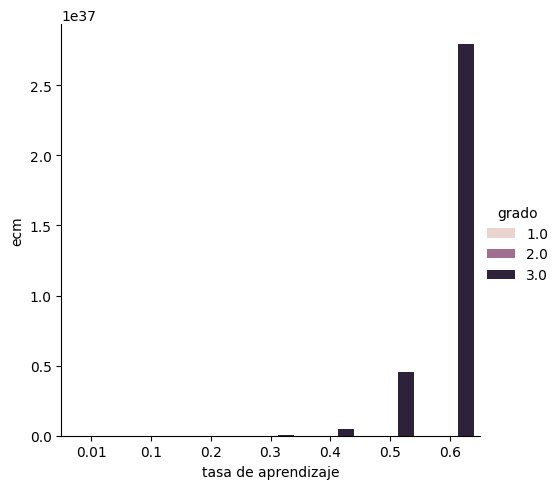

In [ ]:
# ejecuta esta linea de codigo para graficar tus resultados
# aca usamos una libreria llamada seaborn
import seaborn as sns
s = sns.catplot(data = resultados_ex2, x = 'tasa de aprendizaje',
            y = 'ecm',hue ='grado', kind = 'bar', )

(0.0, 100000.0)

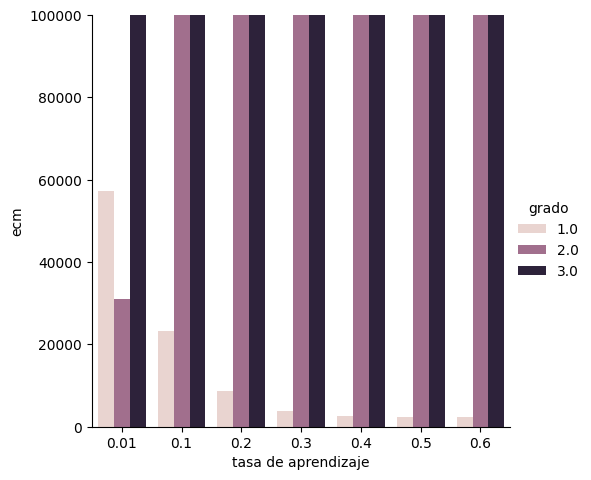

In [ ]:
# ejecuta esta linea de codigo para graficar tus resultados
# aca usamos una libreria llamada seaborn
import seaborn as sns
s = sns.catplot(data = resultados_ex2, x = 'tasa de aprendizaje',
            y = 'ecm',hue ='grado', kind = 'bar', )
plt.ylim(0,1e5)

[Existen diferentes tipos de normalización](https://docs.microsoft.com/es-es/azure/machine-learning/component-reference/normalize-data). Dependiendo del contexto seleccionar un tipo especifico puede tener efectos en nuestros resultados. Responde la siguiente pregunta abierta.

In [ ]:
#@title Pregunta Abierta
#@markdown **¿Qué nombre recibe la normalización que utilizamos?**

#@markdown A) `Zscore`, ya que usamos la función de la libreria `stats.stats.zscore`

#@markdown B) `min-max` que se implemento con el uso de la función `stats.stats.zscore`

#@markdown C) `Zscore` ya que restamos la media y dividimos por las desviación estandar

#@markdown D) Logística ya que usamos la función sigmiode para implementar la regresión

#@markdown E) Ninguna de las anteriores

#@markdown Recuerda escoger la opción que este mejor justificada
respuesta_1_6 = 'C' #@param ["", "A", "B", "C", "D", "E"]

Finalmente, en nuestro tercer experimento, vamos ver el efecto de las iteraciones sobre el error. Esta vez la tasa de aprendizaje es constante

In [ ]:
## ejercicio de codigo
def experimentar_2 (Xtrain, Xtest, Ytrain, Ytest, iteraciones, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje
        para realizar los experimentos
    rangos: Es una lista con los valores númericos de grados
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    eta = 1e-2
    resultados = pd.DataFrame()
    idx = 0 # indice
    for iter in iteraciones:
        for grado in grados:
            # ignora el costo
            W , _= gradiente_descendente_poly(Xtrain,Ytrain,eta,iter, grado)
            error =evaluar_modelo_poly(Ytest, Xtest, W, grado)

            resultados.loc[idx,'iteraciones'] = iter
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'ecm'] = error
            idx = idx+1
    return (resultados)

In [ ]:
num_iters = [1,5,10,50, 100,200, 1000, 2000]
grados_polinomio = [1,2]
# usamos la funcion para evaliar los resultados
resultados_ex3 = experimentar_2(Xtrain_n, Xtest_n, Ytrain, Ytest, num_iters, grados_polinomio )

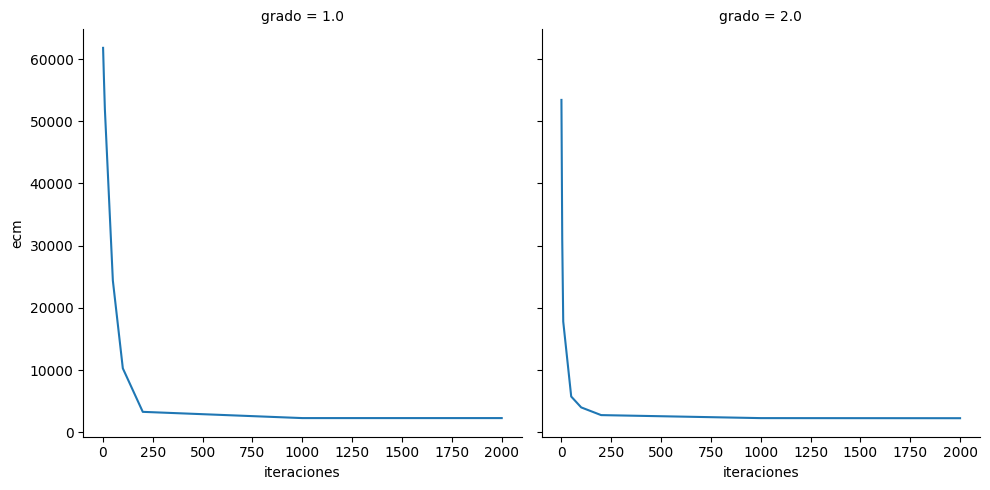

In [ ]:
# ejecuta esta linea de codigo para ver raficamente tus resultados
# aca usamos una libreria llamada seaborn
import seaborn as sns
sns.relplot(data = resultados_ex3, x = 'iteraciones',
            y = 'ecm',col ='grado', kind = 'line')

In [ ]:
#@title Pregunta Abierta
#@markdown  **¿Qué efecto tiene el número de iteraciones en el error de predicción del modelo?**
respuesta_1_7 = "A medida que se incrementa el número de iteraciones, es más probable que el algoritmo de gradiente descendente llegue hasta un mínimo local o global, llegar al minimo local o global tambien depende de la tasa de aprendizaje, si la ETA es muy pequeña y la tasa de aprendizaje muy pequeña quizá el algortimo no coverja con el minimo global ni local  " #@param {type:"string"}

# **Parte 2. Regresión logística**


In [ ]:
import scipy.io
from IPython.display import Image

## Ejercicio 1: Contextualización del problema

En esta parte, vamos a resolver un problema de clasificación. Las variables que vamos a usar están disponibles en scipy

En este ejercicio de clasificación o regresión logística, nuestro objetivo es predecir el estado futuro de los estudiantes: desertar o graduarse. Para lograrlo, utilizaremos diversas variables predictoras, entre las que se incluyen:

1. **Nota del segundo semestre**
2. **Edad**
3. **Target** (0 para Deserción, 1 para Graduado)

 Estas variables fueron seleccionadas debido a su fuerte relación con la variable objetivo, basándonos en criterios como la **correlación** para relaciones entre variables categóricas y numéricas.

In [ ]:
mat = pd.read_csv('clasificacion_preprocesado.csv')
x = mat[['Curricular units 1st sem (approved)','Curricular units 2nd sem (enrolled)']]
y = mat['Target'] # Variable de salida

In [ ]:
y = y.apply(lambda x: 0 if x=='Dropout' else  1)

In [ ]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos, muestra \n",x.iloc[range(10), :] )
print("")
print(" muestra de etiquetas a predecir \n", y.iloc[range(10)])

conjunto de datos, muestra 
    Curricular units 1st sem (approved)  Curricular units 2nd sem (enrolled)
0                            -1.521257                            -2.838337
1                             0.418050                            -0.105726
2                            -1.521257                            -0.105726
3                             0.418050                            -0.105726
4                             0.094832                            -0.105726
5                             0.094832                            -0.561161
6                             0.741268                             0.805144
7                            -1.521257                            -0.561161
8                             0.418050                            -0.105726
9                             0.094832                            -0.105726

 muestra de etiquetas a predecir 
 0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: Target, dtype: int64


In [ ]:
#Ejercicio de Codigo
def carac_muestras_clases(X, Y):
    """Esta funcion es encargada retornar el numero clases, muestras
        y caracteristicas del conjunto de datos X y Y

        X: matriz numpy con el conjunto de datos para entrenamiento
        Y: matriz numpy con el conjunto de etiquetas
        retorna:
            numero de caracteristicas (int/float)
            numero de muestras (int/float)
            numero de clases (int/float)

    """
    ##Pista: es de utilidad el metodo np.unique ?
    N,nf = X.shape
    clases = len(np.unique(Y))
    return ( nf,N, clases)

In [ ]:
print(carac_muestras_clases(x,y))

(2, 4424, 2)


En los problemas de clasificación, es de utilidad visualizar los datos. De esta manera se puede determinar que modelos o algortimos pueden tener mejor rendimiento. La función [scatter](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) nos permite realizar este tipo de graficas, explora la documentación y usa la siguiente celda para realizar la grafica y con lo aprendido responder la pregunta abierta.

En este tipo de graficas tambien es útil usar los [colorMaps](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html), que son básicamente paletas de colores que defines los posibles colores dentro de la grafica.

In [ ]:
x= np.array(x)
y = np.array(y).reshape(4424,1)
print((x).shape)
print((y).shape)

(4424, 2)
(4424, 1)


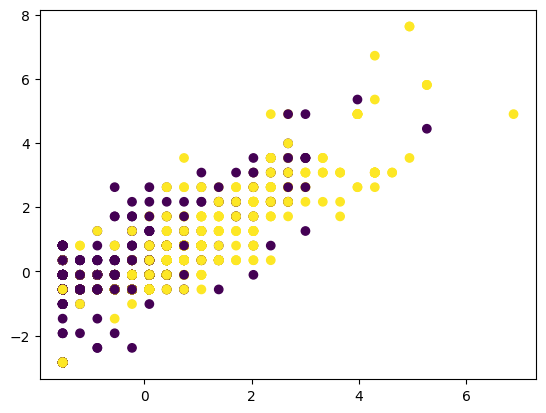

In [ ]:
## puedes acceder con plt a la funcion adecuacada
## Pista: recuerda como indexar matrices
## Consulta como pasar el Color Map
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')
# para mostrar el grafico
plt.show()

In [ ]:
#@title Pregunta Abierta
#@markdown Con la grafica creada ¿cual de las afirmaciones es mejor justificada?

#@markdown A) `plt.scatter(x[:,0],x[:,1], c=y, cmap = 'seismic')` permite ver la primera caracteristica en el eje Y y la segunda caracteristica en el eje X. La etiqueta de la muestra es representada por el color mediante una paleta de colores divergente

#@markdown B) `plt.scatter(c=y, x = x[:,1], y = x[:,0],  cmap = 'viridis')` permite ver la primera caracteristica en el eje X y la segunda caracteristica en el eje Y. La etiqueta de la muestra es representada por el color mediante una paleta de colores binaria

#@markdown C) `plt.scatter(x, c=y, cmap = 'binary')`  permite ver una grafica para poder determinar si un modelo de clasificación puede ajustarse. La etiqueta de la muestra representa el color mediante una paleta de colores sequencial

#@markdown D) `plt.scatter(x[:,0],x[:,1], c=y, cmap = 'seismic')` permite ver la primera caracteristica en el eje X y la segunda caracteristica en el eje Y. La etiqueta de la muestra representa el color mediante una paleta de colores divergente

#@markdown Selecciona dentro las lista desplegable
respuesta_2_1 = 'C' #@param ["", "A", "B", "C", "D"]

In [ ]:
#@title Pregunta Abierta
#@markdown Analiza el resultado que han obtenido

#@markdown Selecciona dentro las lista desplegable
respuesta_2_2 = 'C' #@param ["", "A", "B", "C", "D"]

## Ejercicio 2: entrenamiento

El modelo de *regresión logística* que sirve para resolver problemas de clasificación (en principio biclase).

¿Cómo se relacionan los siguientes conceptos a la luz del modelo de regresión logística?

1. Función de activación
2. Extensión de matriz
2. Modelo de regresión logística
3. Potencia del polinomio
4. El cálculo del error en clasificación
5. El gradiente descendente

**Función del sigmoide:**

In [ ]:
#Ejercicio de Código
def sigmoidal(z):
    """Función de activación Sigmoidal

    z: es la varible a la que se le va aplicar el sigmoide.
       es un array numpy de una sola dimension
    retorna: el valor del sigmoide

    """
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    # ¿Que metodo de np...{} es de utilidad?
    s = np.exp(z)/(1+np.exp(z))

    return s

La siguiente celda se sugiere la implementación de 3 métodos que nos ayudarán a implementar los otros conceptos.

1. Modelo de regresión logística (Esta función usa nuestra `sigmoidal`)
2. Extensión de matriz
2. Potencia del polinomio
4. Cálculo del error en clasificación

Debemos comprender que hacen estas funciones para determinar donde poder usarlas mas adelante. Luego de ellos, ejecuta la celda para cargarlas.

In [ ]:
def logistic_regression(X, W):
    """calcula la regresión logistica
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado por la regresion
    """
    #Con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Yest = np.dot(X,W)
    Y_lest = sigmoidal(Yest)

    return Y_lest    #Y estimado: Esta variable contiene ya tiene la salida de sigm(f(X,W))

def extension_matriz(X):
    """funcion que realiza la extension de la matriz X
    X: los valores que corresponden a las caractersiticas sin extender
    retorna: X_ext: matriz con unos extendidos
    """
    #Obtenemos las dimensiones antes de exteneder la matriz
    muestras,caracterisitcas =X.shape
    #Extendemos la matriz X
    unos = np.array([np.ones(muestras)])
    X_ext = np.concatenate((unos.T, X), axis=1)
    X_ext = X_ext.reshape(muestras, caracterisitcas+1)
    return (X_ext)


def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las caractersiticas
    grado: esl grado para realizar la potencia al polinomio
    retorna: el valor de X despues elevarlo al grado del polinimoo indicado
    """
    X2 = X.copy()

    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)

    return X2

def cost_logistic(Y_lest, Y):
    """calculo del error logistico
       Si es diferente el Y_estimado con el Y_real cuenta como un error
       Y_lest: numpy array con los valores reales estimados
       Y:  numpy array  valor con los valores reales de las etiquetas
       retorna: costo logistico  -- numpy array
    """
    f1 = Y*np.log(Y_lest)
    f2 = (1-Y)*np.log(1-Y_lest)
    error = -np.sum(f1+f2)/Y.shape[0]
    return error

In [ ]:
# ten en cuenta la salida de esta prueba para responder la pregunta abierta siguiente
vector = np.array([[1,4]])
print(vector)
# puedes cambiar el valor del grado
potenciaPolinomio(vector, grado=6)

[[1 4]]


array([[   1,    4,    1,   16,    1,   64,    1,  256,    1, 1024,    1,
        4096]])

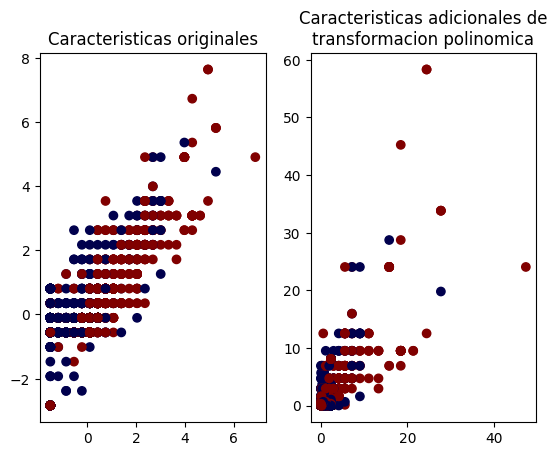

In [ ]:
# Verificar como influye la potencia de polinomio
x_pol = potenciaPolinomio(x, grado = 2)
g , (ax1, ax2 )= plt.subplots(1,2)
ax1.set_title("Caracteristicas originales")
ax1.scatter (c=y, x = x_pol[:,0], y = x_pol[:,1],  cmap = 'seismic')
ax2.set_title("Caracteristicas adicionales de\ntransformacion polinomica")
ax2.scatter(c=y, x = x_pol[:,2], y = x_pol[:,3],  cmap = 'seismic')

In [ ]:
#@title Pregunta Abierta
#@markdown  Analizando lo anterior  ¿Cuál sería la representación de `potenciaPolinomio(vector, grado=2)`?
#@markdown (usa ** para representar potencia, i.e x1**2 simboliza x1 elevado al cuadrado)
#@markdown Entendiendo esta transnformacion ¿Aplicar la `potenciaPolinomio(vector=x, grado=2)` hace que el problema se vuelva linealmente separable?

respuesta_2_3 = "Aplicar esta transformación aumenta la dimensionalidad del espacio de las variables, en ocasiones ocurre que si se vuelva linealmente separable, en nuestro caso no aplica" #@param {type:"string"}

recordando lo aprendido anteriormente, dividimos nuestro cojunto de datos y normalizamos.
**SOLO EJECUTAR UNA VEZ**

In [ ]:
#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
N = x.shape[0]
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]
# normalizamos
Xtrain, Xtest = normalizar(Xtrain, Xtest)

<ipython-input-26-415f76c6248c>:12: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  Xtrain_n = stats.stats.zscore(Xtrain)


Ahora vamos a completar el código de la regla de actualización de los parámetros del algoritmo de **gradiente_descedente**

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$

recordar que aca queremos reducir el error logístico, pero la actualización de los pesos sigue siendo equivalente a la regresión vista anteriormente, solo que agregando la función  $g$  que corresponde al sigmoide.

$$ \frac{\partial E(w)}{\partial w_j} = \frac{\partial J({\bf{w}})}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N}\left( g(f({\bf{x}}_i,{\bf{w}})) - t_i\right)x_{ij}$$

Debemos tener presente:
- Usar las funciones ya implementadas y no usar **ninguna otra libreria** adicional a las librerias ya pre-cargadas como numpy.
- Dentro de nuestra función **vamos incluir una transformación polinómica**, por lo tanto el proceso a implementar puede ser descrito en los siguientes pasos:
    - Aplicar la transformación polinómica
    - Extender la matriz
    - Inicializar $w$
    - Y por cada iteración realizar el cálculo para actualizar $w$


In [ ]:
#ejercicio de codigo
def gradiente_descendente_logistic_poly(X,Y,grado,eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    grado: grado para usar en la transformacion polinomica
    iteraciones: numero de iteraciones maxima

    retorna: W el valor de de los parametros de regresión polinomica
    """
    # aplicamos la transformación
    X2 = potenciaPolinomio(X,grado)

    # realizamos la extensión
    X2_ext =extension_matriz(X2)

    #Tomamos el número de variables del problema luego de la transformacion
    d = X2_ext.shape[1]
    #Tomamos el número de muestras de la base de datos
    N = X2_ext.shape[0]
    #Inicializamos w
    W = np.zeros(d)
    W = W.reshape(np.size(W),1)
    costos = np.zeros(iteraciones)

    for iter in range(iteraciones):

        #Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        #logística. Tenga en cuenta los nombres de las variables ya creadas: W, X, Y
        Yest=logistic_regression(X2_ext,W)
        costo = cost_logistic(Yest,Y)
        W =  W-eta*(np.dot(X2_ext.T,(logistic_regression(X2_ext,W)-Y))/N)
        #adicionamos el costo por cada iteracion
        costos[iter] = costo


    print("costo despues de finalizar las iteraciones", costo)
    return W, costos

Veamos de manera preliminar, si nuestro algortimo de gradiente esta optimizando el error.
Vamos entrenar con 100 iteraciones y vamos a graficar el costo logistico y verificar como cambia de acuerdo a las iteraciones.
¿Que pasa si cambias el grado?

costo despues de finalizar las iteraciones 0.45267980291792503
este las dimensiones de w son: (3, 1)


Text(0, 0.5, 'Error')

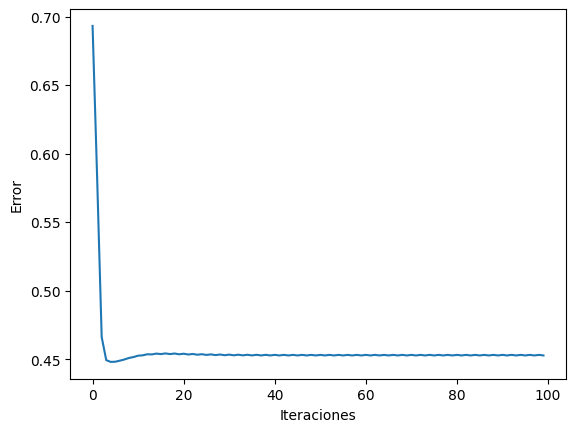

In [ ]:
iteraciones = 100
w, costos_logistico = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado = 1, eta = 10, iteraciones = iteraciones)
print("este las dimensiones de w son:", w.shape)
plt.plot(range(iteraciones), costos_logistico)
plt.xlabel('Iteraciones')
plt.ylabel('Error')

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Con base a los resultados anteriores, qué efecto tiene el grado del polinomio en la predicción del modelo? justifique
respuesta_2_4 = "A medida que aumenta el grado del polinomio, se introducen más características polinomiales en el espacio de características. Esto puede hacer que el modelo sea capaz de capturar relaciones no lineales más complejas entre las variables independientes y la variable respuesta" #@param {type:"string"}

Como habiamos visto antes, el error es nuestra medida de optimización, pero al final debemos evaluar que también se está realizando la tarea de clasificar. Entiende la siguiente función. Prestemos especial atención al bloque if-else.

In [ ]:
def evaluar_modelo (W, X_to_test, Y_True, grado):
    """ funcion que evalua un modelo de clasificación

W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: valor del polinomio a usar

    retorna: el error de clasificación.
    """
    X2 = potenciaPolinomio(X_to_test,grado)
    # realizamos la extensión
    X2_ext = extension_matriz(X2)
    Y_EST = logistic_regression(X2_ext,W)
    #Se asignan los valores a 1 o 0 según el modelo de regresión logística definido
    for pos, tag in enumerate (Y_EST):

        if tag >= 0.5:
            Y_EST[pos] = 1
        else:
            Y_EST[pos] = 0

    error = 0

    for ye, y in zip(Y_EST, Y_True):
        if ye != y:
            error += 1
    error_clasificacion =  error/np.size(Y_True)
    return(error_clasificacion)


Probemos la función al evaluar el w obtenido. Tener presente que para la evaluación usamos el X y Y adecuado. Recuerda usar el grado de acuerdo a la última ejecución.

In [ ]:
# recuerda que si entrenaste con grado = 2 debes asignar el mismo valor.
error_test = evaluar_modelo(w, Xtest, Ytest, grado = 1)
print("error en el conjunto de pruebas", error_test)

error en el conjunto de pruebas 0.19291635267520724


## Ejercicio 3: Experimentar
En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinomios. Vamos a dejar por ahora un número de iteraciones fijas = 30.

In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 30

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:
            # ignorar el costo
            W, _ = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado,eta,numero_iter)
            error_entrenamiento = evaluar_modelo(W,Xtrain,Ytrain,grado)
            error_prueba = evaluar_modelo(W,Xtest,Ytest,grado)
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'error_entreamiento'] = error_entrenamiento
            resultados.loc[idx,'error_prueba'] = error_prueba
            idx = idx+1

    return (resultados)

In [ ]:
tasas = [ 4,3,1.0, 0.1, 0.001]
grados = [1,2,3,4]
resultados = experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados)

In [ ]:
# para ver los resultados
resultados

,grado,tasa de aprendizaje,error_entreamiento,error_prueba
0,1.0,4.000,0.180820,0.180106
1,2.0,4.000,0.249919,0.253203
2,3.0,4.000,0.683242,0.668425
3,4.0,4.000,0.683242,0.668425
4,1.0,3.000,0.180820,0.180106
5,2.0,3.000,0.195027,0.203466
6,3.0,3.000,0.683242,0.668425
7,4.0,3.000,0.683242,0.668425
8,1.0,1.000,0.186309,0.193670
9,2.0,1.000,0.195027,0.206481


In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Con base a los resultados anteriores, qué efecto tiene la  tasa de aprendizaje en los errores de entrenamiento y de validación? justifique
respuesta_2_5 = "Si la tasa de aprendizaje es muy pequeña en los errores de entrenamiento se puede dar el caso en que no llegue a converger con el minimo local o global en las iteraciones asignadas, si es muy grande puede que no logre converger y omita el minimo, si ocurre alguno de los dos casos, se debe ver reflejado en errores altos en validación" #@param {type:"string"}

Vamos entrenar nuevamente pero solo con los mejores parámetros. Si hay parametros empatados, el modelo que tenga menos parámetros deberia ser el mejor (recuerda que cuando aumentamos el grado del polinomio aumentamos el número de parametros del modelo).

In [ ]:
# puedes usar el siguiente código para ordenar los resultados y ver los 3 primeros
# resultados, usa esta salida, para ver cuales fueron los mejores parámetros
resultados.sort_values(by = ['error_prueba', 'grado'], ascending = True).head(3)

,grado,tasa de aprendizaje,error_entreamiento,error_prueba
0,1.0,4.0,0.180820,0.180106
4,1.0,3.0,0.180820,0.180106
8,1.0,1.0,0.186309,0.193670


**Entrenemos con los mejores parámetros**

In [ ]:
# ignoramos el costo!
W,_= gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado = 1 ,eta =0.2  , iteraciones = 20)
print("estos son los pesos para el modelo entrenando \n", W)

costo despues de finalizar las iteraciones 0.5466747215557408
estos son los pesos para el modelo entrenando 
 [[0.48387936]
 [0.57591176]
 [0.03373719]]


Usando los valores del ultimo $w$ entrenado podríamos construir la función que define nuestra frontera.